# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as c
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pickle
%matplotlib inline

# Read the Dataset

In [2]:
data = pd.read_csv('chronickidneydisease.csv')

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Understanding datatypes and summery of features 

In [4]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
data.shape

(400, 26)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [7]:
data['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [8]:
data['classification']=data['classification'].replace("ckd\t","ckd")
data['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

#### Categorical Columns 

In [9]:
catcol = set(data.dtypes[data.dtypes=='O'].index.values)
print(catcol)

{'rbc', 'wc', 'pc', 'pcc', 'rc', 'ba', 'cad', 'ane', 'classification', 'htn', 'appet', 'pcv', 'pe', 'dm'}


In [10]:
for i in catcol:
    print("Columns: ",i)
    print(c(data[i]))
    print("*"*120+"\n")

Columns:  rbc
Counter({'normal': 201, nan: 152, 'abnormal': 47})
************************************************************************************************************************

Columns:  wc
Counter({nan: 105, '9800': 11, '6700': 10, '9600': 9, '9200': 9, '7200': 9, '6900': 8, '11000': 8, '5800': 8, '7800': 7, '9100': 7, '9400': 7, '7000': 7, '4300': 6, '6300': 6, '10700': 6, '10500': 6, '7500': 5, '8300': 5, '7900': 5, '8600': 5, '5600': 5, '10200': 5, '5000': 5, '8100': 5, '9500': 5, '6000': 4, '6200': 4, '10300': 4, '7700': 4, '5500': 4, '10400': 4, '6800': 4, '6500': 4, '4700': 4, '7300': 3, '4500': 3, '8400': 3, '6400': 3, '4200': 3, '7400': 3, '8000': 3, '5400': 3, '3800': 2, '11400': 2, '5300': 2, '8500': 2, '14600': 2, '7100': 2, '13200': 2, '9000': 2, '8200': 2, '15200': 2, '12400': 2, '12800': 2, '8800': 2, '5700': 2, '9300': 2, '6600': 2, '12100': 1, '12200': 1, '18900': 1, '21600': 1, '11300': 1, '\t6200': 1, '11800': 1, '12500': 1, '11900': 1, '12700': 1, '13600':

#### Numerical Columns 

In [11]:
numcol = set(data.dtypes[data.dtypes!='O'].index.values)
print(numcol)

{'sc', 'sg', 'bgr', 'sod', 'age', 'id', 'bp', 'bu', 'hemo', 'al', 'pot', 'su'}


#### Rectifying the categorical columns

In [12]:
data['cad'] = data.cad.replace('\tno','no')
c(data['cad'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [13]:
data['dm'] = data.dm.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(data['dm'])

Counter({'yes': 137, 'no': 261, nan: 2})

## Data Visualization

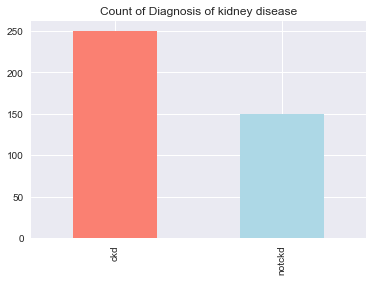

In [14]:
data['classification'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of kidney disease")

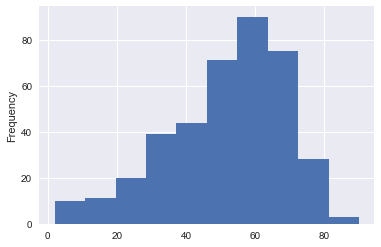

In [15]:
data['age'].plot(kind='hist')

#### Inference: Herewith the help of histogram we can see that 50-60 age group people are widely spread in this dataset.

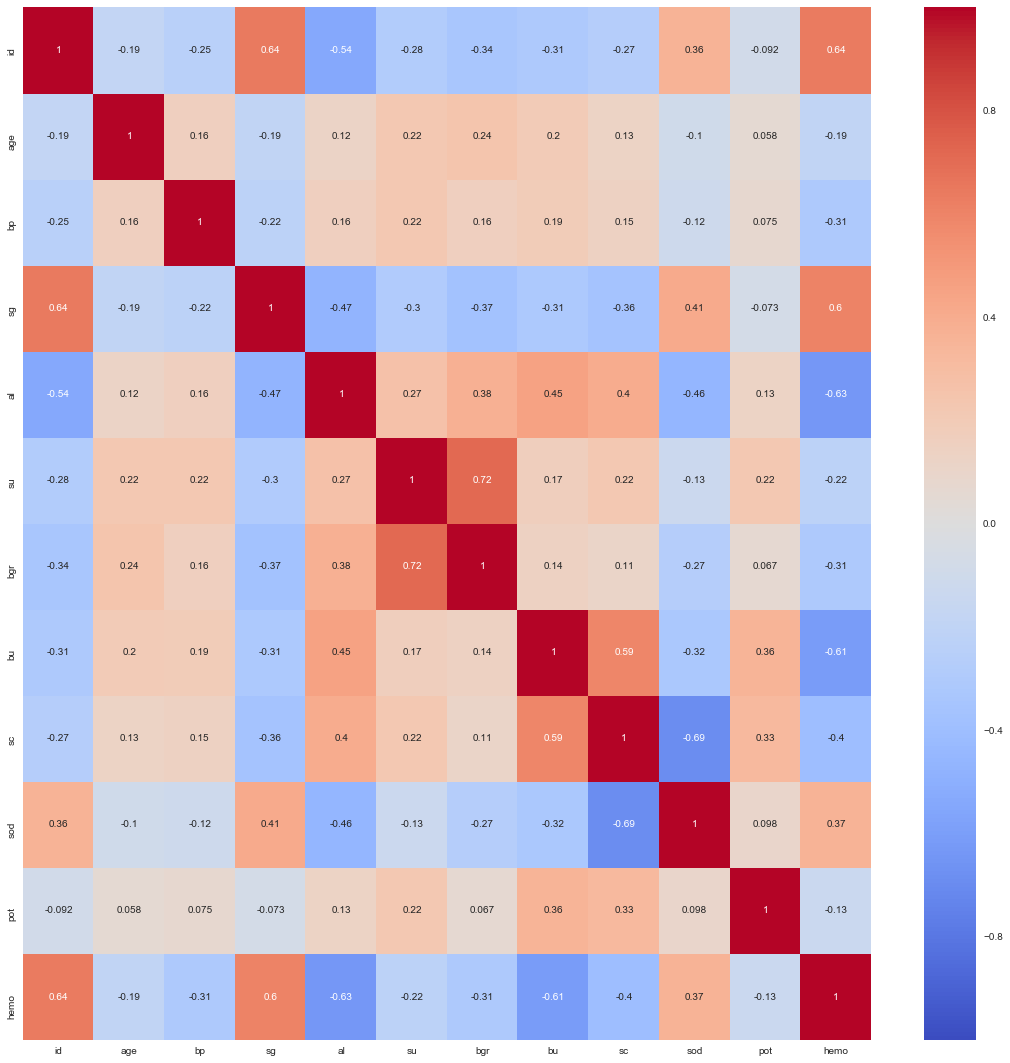

In [16]:
plt.figure(figsize = (19,19))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

# Handling the missing values

In [17]:
data.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [18]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [19]:
data.pcv = pd.to_numeric(data.pcv,errors='coerce')
data.wc = pd.to_numeric(data.wc,errors='coerce')
data.rc = pd.to_numeric(data.rc,errors='coerce')

# Replacing the missing values

In [20]:
data['bgr'].fillna(data['bgr'].mean(),inplace=True)
data['bp'].fillna(data['bp'].mean(),inplace=True)
data['bu'].fillna(data['bu'].mean(),inplace=True)
data['hemo'].fillna(data['hemo'].mean(),inplace=True)
data['pcv'].fillna(data['pcv'].mean(),inplace=True)
data['pot'].fillna(data['pot'].mean(),inplace=True)
data['rc'].fillna(data['rc'].mean(),inplace=True)
data['sc'].fillna(data['sc'].mean(),inplace=True)
data['sod'].fillna(data['sod'].mean(),inplace=True)
data['wc'].fillna(data['wc'].mean(),inplace=True)

data['age'].fillna(data['age'].mode()[0],inplace=True)
data['htn'].fillna(data['htn'].mode()[0],inplace=True)
data['pcc'].fillna(data['pcc'].mode()[0],inplace=True)
data['appet'].fillna(data['appet'].mode()[0],inplace=True)
data['al'].fillna(data['al'].mode()[0],inplace=True)
data['pc'].fillna(data['pc'].mode()[0],inplace=True)
data['rbc'].fillna(data['rbc'].mode()[0],inplace=True)
data['cad'].fillna(data['cad'].mode()[0],inplace=True)
data['ba'].fillna(data['ba'].mode()[0],inplace=True)
data['ane'].fillna(data['ane'].mode()[0],inplace=True)
data['dm'].fillna(data['dm'].mode()[0],inplace=True)
data['pe'].fillna(data['pe'].mode()[0],inplace=True)
data['sg'].fillna(data['sg'].mode()[0],inplace=True)

# Label Encoding

In [21]:
for i in catcol:
    print("Label Encoding of: ",i)
    LE = LabelEncoder()
    print(c(data[i]))
    data[i] = LE.fit_transform(data[i])
    print(c(data[i]))
    print("*"*100)

Label Encoding of:  rbc
Counter({'normal': 353, 'abnormal': 47})
Counter({1: 353, 0: 47})
****************************************************************************************************
Label Encoding of:  wc
Counter({8406.1224489795914: 106, 9800.0: 11, 6700.0: 10, 9600.0: 9, 9200.0: 9, 7200.0: 9, 6900.0: 8, 11000.0: 8, 5800.0: 8, 7800.0: 7, 9100.0: 7, 9400.0: 7, 7000.0: 7, 4300.0: 6, 6300.0: 6, 10700.0: 6, 10500.0: 6, 7500.0: 5, 6200.0: 5, 8300.0: 5, 7900.0: 5, 8600.0: 5, 5600.0: 5, 10200.0: 5, 5000.0: 5, 8100.0: 5, 9500.0: 5, 6000.0: 4, 8400.0: 4, 10300.0: 4, 7700.0: 4, 5500.0: 4, 10400.0: 4, 6800.0: 4, 6500.0: 4, 4700.0: 4, 7300.0: 3, 4500.0: 3, 6400.0: 3, 4200.0: 3, 7400.0: 3, 8000.0: 3, 5400.0: 3, 3800.0: 2, 11400.0: 2, 5300.0: 2, 8500.0: 2, 14600.0: 2, 7100.0: 2, 13200.0: 2, 9000.0: 2, 8200.0: 2, 15200.0: 2, 12400.0: 2, 12800.0: 2, 8800.0: 2, 5700.0: 2, 9300.0: 2, 6600.0: 2, 12100.0: 1, 12200.0: 1, 18900.0: 1, 21600.0: 1, 11300.0: 1, 11800.0: 1, 12500.0: 1, 11900.0: 1, 1270

# Splitting The Dataset Into Dependent And Independent Variable

In [22]:
selected_col = ['bu','bgr','cad','ane','pc','rbc','dm','pe']
x = pd.DataFrame(data,columns=selected_col)
y = pd.DataFrame(data,columns=['classification'])
print(str(x.shape)+" "+str(y.shape))

(400, 8) (400, 1)


# Split The Dataset Into Train Set And Test Set

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print("x_train: "+str(x_train.shape)+"\n"+"x_test: "+str(x_test.shape)+"\n"+"y_train: "+str(y_train.shape)+"\n"+"y_test: "+str(x_test.shape))

x_train: (320, 8)
x_test: (80, 8)
y_train: (320, 1)
y_test: (80, 8)


# Model Building

In [24]:
model = LogisticRegression()
model.fit(x_train,y_train)

c:\Users\ELCOT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Test The Model

In [25]:
y_pred = model.predict(x_test)
y_pred1 = model.predict([10,140,0,0,1,1,0,0])
print(y_pred)
c(y_pred)

[0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1
 0 1 0 1 1 0]


c:\Users\ELCOT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Counter({0: 48, 1: 32})

In [26]:
accuracy_score(y_test,y_pred)

0.92500000000000004

In [27]:
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[48  6]
 [ 0 26]]


# Save The Model

In [28]:
pickle.dump(model,open('Final_CKD.pkl','wb'))